## Hands-on : Build, Train, and Evaluate your own GeoAI CNN Model in 10 steps



In this exercise you will use a well-known training dataset based on Sentinel-2 satellite data, which is called 'EuroSat' for short. 

The activity already has the beginning code to load the training data (ds_train) using the tensorflow_datasets library.

Note: There is an alternative download method at the bottom of the notebook that will require additional code to connect the data to the model, but is a solid start for those of you who would like to "try it yourself."

For this hands-on exercise, I want you to :
1. Explore different models, parameters, training processes, epochs, and/or configurations in order to improve model performance. Focus your efforts on improving the values: val_loss and val_sparse_categorical_accuracy below. Try at least 7 different attempts. *Note: This will take time!*

2. Identify your best attempt. The one that had the best val_loss and val_sparse_categorical_accuracy.

3. Reflect on your experiences and what you learned in trying to improve the performance of a machine learning model. Include the good, the bad, and the ugly. :)

Feel free to work collaboratively or alone. We are all here to learn (including the machines)



Welcome to this exercise! You'll be working with a popular dataset called EuroSat. This dataset uses Sentinel-2 satellite data and is broken into 10 land-use classes, which you will see in a bit.

The initial code will help you load the training data (ds_train) using the `tensorflow_datasets` library.

Note: At the bottom of the notebook, there’s an alternative download method. It requires extra code to connect the data to the model but is a great option for those who want a more hands-on approach. Or are looking to replicate this process with your own dataset.

For this hands-on exercise, here’s what you’ll do:
1. **Experiment with Models**: Try out different AI model architectures, parameters, training processes, epochs, and configurations to improve performance. You will try to improve the accuracy of your model. *Note: This will take time, because you will be training your AI model!*
2. **Identify Your Best Attempt**: Identify the model that achieved the best accuracy.
3. **Reflect on Your Experience**: Share what you learned while improving the model's performance. Include the good, the bad, and the ugly aspects of your journey. :)

Feel free to work alone or collaborate with others. Remember, we are all here to learn (including the machines)!

Happy experimenting!

### Optional: GeoAI Model Attempt Log
##### Attempt 1: Describe the parameter or configuration that you changed. This is just a demonstration. Below is the accuracy score from the last epoch. Don't worry for now, this will make sense later in the hands-on activity.

*DEFAULT RUN*

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m28s[0m 23ms/step - loss: 1.2717 - sparse_categorical_accuracy: 0.5357 - val_loss: 0.9259 - val_sparse_categorical_accuracy: 0.6517
</code>

##### Attempt 2:
Increased the number of epochs from 2 to 4.

<code>
Epoch 4/4
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m30s[0m 25ms/step - loss: 0.7662 - sparse_categorical_accuracy: 0.7546 - val_loss: 0.8506 - val_sparse_categorical_accuracy: 0.7070

</code>

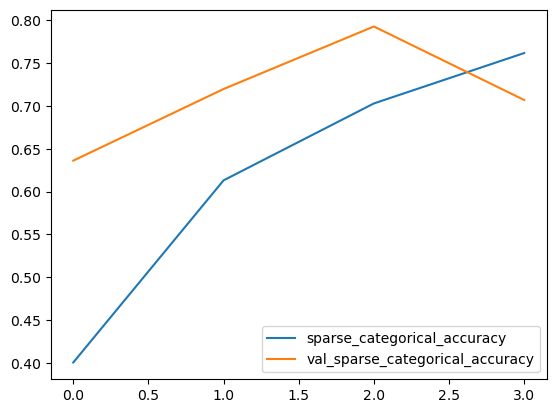

##### Attempt 3:
Decreased the kernel size from 5 to 2. 

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m23s[0m 20ms/step - loss: 1.1332 - sparse_categorical_accuracy: 0.6140 - val_loss: 0.7919 - val_sparse_categorical_accuracy: 0.7372

</code>

##### Attempt 4:
Added two more layers of the format:

<code>
layers.BatchNormalization(),

layers.Conv2D(64, 3, padding='same', activation='relu'),

layers.Conv2D(64, 3, padding='same', activation='relu'),

layers.MaxPool2D(),

</code>

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m35s[0m 29ms/step - loss: 1.2867 - sparse_categorical_accuracy: 0.5337 - val_loss: 0.8674 - val_sparse_categorical_accuracy: 0.6933

</code>

##### Attempt 5:
Increased the kernel size in the second and third layers from 3 to 5. 

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m45s[0m 38ms/step - loss: 1.3932 - sparse_categorical_accuracy: 0.4822 - val_loss: 1.0675 - val_sparse_categorical_accuracy: 0.6094

</code>

##### Attempt 6:
Decreased all kernel sizes to 2.

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m17s[0m 15ms/step - loss: 1.1484 - sparse_categorical_accuracy: 0.6061 - val_loss: 0.7560 - val_sparse_categorical_accuracy: 0.7352

</code>

##### Attempt 7:
Increased the number of neurons in the dense layer from 128 to 256 and 64 to 128 neurons.

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m29s[0m 25ms/step - loss: 1.0370 - sparse_categorical_accuracy: 0.6415 - val_loss: 0.6262 - val_sparse_categorical_accuracy: 0.7877

</code>

##### Attempt 8:
Decreased all kernels to 2 and increased the number of neurons in the dense layer from 128 to 256 and 64 to 128 neurons.

<code>
Epoch 2/2
[1m1181/1181[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m19s[0m 16ms/step - loss: 0.8691 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.5481 - val_sparse_categorical_accuracy: 0.8188

</code>


##### BEST ATTEMPT
My best attempt was the last (attempt 8). 

### Reflection

My best attempt combined two influential factors to improve model accuracy. Increasing the number of neurons in the dense layer resulted in a noticeable improvement in performance. Surprisingly, decreasing the kernel sizes significantly also enhanced the accuracy score. This is perplexing, as one might assume that larger kernels would provide more information to the model. However, smaller kernels may have simplified the classification process, allowing the model to learn better over time. I found it surprising that other tactics, like adding more epochs or layers, had minimal impact on accuracy. My main takeaway is that increased complexity does not always lead to improved performance.

## Step Zero
Before we begin, you should scroll down and see the "Code Explained" section. This notebook contains an explanation for each of the ten steps below. So if you are unsure about a line of Python or a parameter, scroll down for an in-depth explanation.

In [67]:
# Inspiration and credit here:
# https://www.kaggle.com/ryanholbrook/starter-eurosat
# https://morioh.com/p/d1c01ca58d85

# They are great examples of how to get a model working for Eurosat.

In [1]:
# 1. Install packages
!pip install tensorflow
!pip install tensorflow_datasets
!pip install pandas

In [2]:
# 2. Import packages and load our training and validation data
# Tensorflow datasets : https://www.tensorflow.org/datasets/overview
import tensorflow_datasets as tfds
import tensorflow as tf

# Split guide: https://www.tensorflow.org/datasets/splits
# If you want to split the dataset

# Download our dataset.
ds_train, ds_info = tfds.load('eurosat/rgb', split='train', shuffle_files=True, with_info=True)


2024-10-20 18:12:42.441995: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-20 18:12:42.932201: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


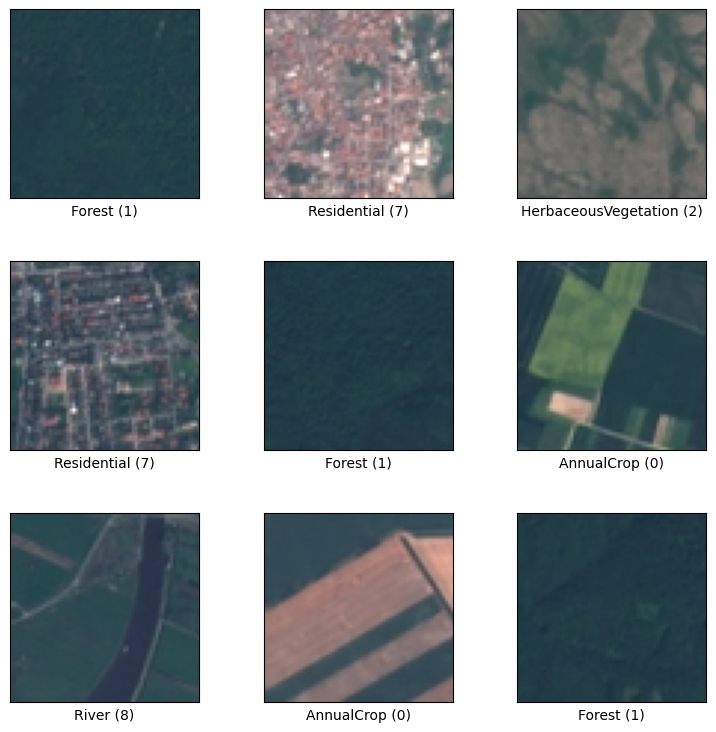

In [3]:
# 3. Show a few examples of training and validation data

fig = tfds.show_examples(ds_train, ds_info)

In [4]:
# 4. See how many examples we have for training and validation
print(ds_info.splits)

{'train': <SplitInfo num_examples=27000, num_shards=1>}


In [5]:
# 5. Prepare our 'pipeline'

# Note: We can change this parameter.
BATCH_SIZE = 16


AUTO = tf.data.experimental.AUTOTUNE
SHUFFLE_BUFFER = int(ds_info.splits['train'].num_examples * 0.7)

# Split our data into training (70%) and validation (30%)
ds_train, ds_valid = tfds.load('eurosat/rgb',
                               split=['train[:70%]', 'train[70%:]'],
                               as_supervised=True)

# Mechanics: the details of these lines are less important than step 6.
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

ds_train = (ds_train
            .map(preprocess, AUTO)
            .cache()
            .shuffle(SHUFFLE_BUFFER)
            .repeat()
            # Augmentations go here .map(augment, AUTO)
            .batch(BATCH_SIZE, drop_remainder=True)
            .prefetch(AUTO))

ds_valid = (ds_valid
            .map(preprocess, AUTO)
            .cache()
            .batch(BATCH_SIZE)
            .prefetch(AUTO))

In [37]:
# 6. Create a simple Convolutional Neural Network

import tensorflow.keras as keras
import tensorflow.keras.layers as layers

# How many label classes do we have
# Note: This is derived from the labels in our dataset. We do not set this unless we create the data.
NUM_CLASSES = ds_info.features['label'].num_classes

# Let's build our model. Here is where the fun begins.
# DEFAULT
# model = keras.Sequential([
#     layers.BatchNormalization(),
#     layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'),
#     layers.MaxPool2D(),

#     layers.BatchNormalization(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),    
#     layers.MaxPool2D(),

#     layers.BatchNormalization(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPool2D(),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# ATTEMPT 8
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.BatchNormalization(),
    layers.Conv2D(32, 2, padding='same', activation='relu'),
    layers.Conv2D(32, 2, padding='same', activation='relu'),    
    layers.MaxPool2D(),

    layers.BatchNormalization(),
    layers.Conv2D(64, 2, padding='same', activation='relu'),
    layers.Conv2D(64, 2, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


In [38]:
# 7. Build/compile our model
# To keep things fair do not change the model.compile lines below for the hands-on exercise.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

In [39]:
# 8. Train the model we created

# How much training? We start with 2 epochs to see accuracy improvement through learning.
# In real-life you would have more EPOCHS. Note, the longer the epochs the longer the training process.
EPOCHS = 2
STEPS_PER_EPOCH = int(ds_info.splits['train'].num_examples * 0.7) // BATCH_SIZE

######

print("Epochs:", EPOCHS)
print("Steps per Epoch:", STEPS_PER_EPOCH)

# Take a look at early stopping, it can help performance/training time
early_stopping = tf.keras.callbacks.EarlyStopping(patience=7, min_delta=0.001, restore_best_weights=True)

# Let's do this.
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[early_stopping],
)

Epochs: 2
Steps per Epoch: 1181
Epoch 1/2
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 1.6391 - sparse_categorical_accuracy: 0.4243 - val_loss: 0.7449 - val_sparse_categorical_accuracy: 0.7558
Epoch 2/2
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.8691 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.5481 - val_sparse_categorical_accuracy: 0.8188


In [40]:
# 9. Tell us about our model.
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_34          │ (16, 64, 64, 3)        │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (16, 64, 64, 16)       │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (16, 32, 32, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (16, 32, 32, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (16, 32, 32, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (16, 32, 32, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (16, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (16, 16, 16, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (16, 16, 16, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (16, 16, 16, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (16, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (16, 4096)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (16, 256)              │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (16, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (16, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (16, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (16, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,342,824 (12.75 MB)

 Trainable params: 1,114,240 (4.25 MB)

 Non-trainable params: 102 (408.00 B)

 Optimizer params: 2,228,482 (8.50 MB)

<Axes: >

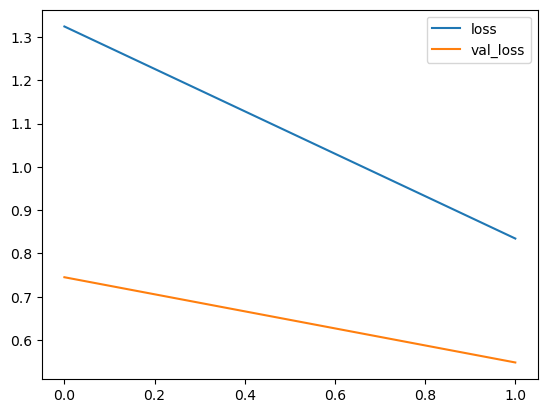

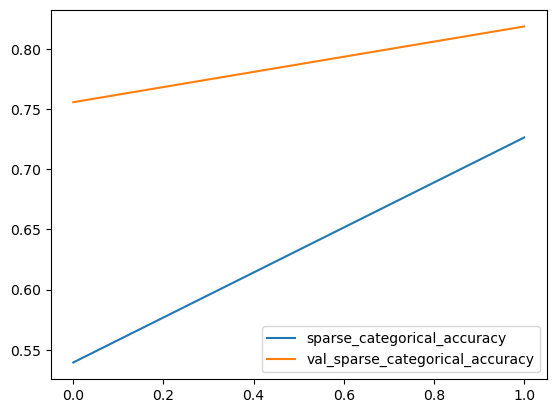

In [41]:
# 10. Plot model performance

#see how well our model classified our validation dataset

import pandas as pd

# Let's see how your model performed during training.

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

# Understanding loss: https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss
# Loss tells us how we are doing on the training dataset
# Validation loss (val_loss) tells us how we are doing on the test/validation dataset.
# So focus on val_loss when evaluating loss.

# Same goes for accuracy (acc)
# Focus on val_sparse_categorical_accuracy
# This will be the metric that we will use to evaluate 'accuracy' for our AI model.
# Once you run this configuration, try adding another convolution layer, removing a convolution layer, changing the number of epochs, add more dense layers. 


## Code Explained
---

### 1. Install packages

Here's a simple explanation of what this code does:

### What the Code Does:
1. **Installing Packages**:
   - `!pip install tensorflow_datasets` and `!pip install pandas` are commands to install two useful tools (or packages) that are not built into Python by default. These tools help us work with data more easily.

### Breakdown:
1. **Installing tensorflow_datasets**:
   - The first command `!pip install tensorflow_datasets` installs a package called TensorFlow Datasets. This package provides a way to easily access and use different datasets (collections of data) that are ready to be used for machine learning projects. Think of it as a library where you can borrow different books (datasets) to learn from.

2. **Installing pandas**:
   - The second command `!pip install pandas` installs a package called Pandas. This tool helps us organize and analyze data, much like how a spreadsheet helps you organize and look at numbers and information in rows and columns. It’s very handy for handling large amounts of data.

### Summary:
- These commands are like telling your computer to get some useful tools from the internet.
- TensorFlow Datasets helps you get and use different datasets easily.
- Pandas helps you organize and analyze your data efficiently.
- Installing these tools makes it easier to work with data for your projects.

### 2. Import packages and load our training data

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Getting Tools Ready**:
   - `import tensorflow_datasets as tfds` and `import tensorflow as tf` are commands to bring in special tools (called libraries) that help us work with data and machine learning. It’s like getting your toolkit ready before starting a project.

2. **Loading Data**:
   - The code is set up to download a dataset, which is a collection of information (in this case, images from the EuroSAT dataset). It’s like going online and downloading a bunch of files that you need for your project.

### Breakdown:
1. **Importing TensorFlow Datasets**:
   - `import tensorflow_datasets as tfds` brings in a library that helps us access and use different datasets easily.
   - `import tensorflow as tf` brings in TensorFlow, a popular library for building and training machine learning models.

2. **Loading and Splitting the Dataset**:
   - The comment `# Split guide: https://www.tensorflow.org/datasets/splits` provides a link to a guide on how to split datasets if needed.
   - `ds_train, ds_info = tfds.load('eurosat/rgb', split='train', shuffle_files=True, with_info=True)` is the command that actually downloads and prepares the dataset:
     - `ds_train` is the variable where the training data (images) will be stored.
     - `ds_info` is the variable where information about the dataset (like the number of images, labels, etc.) will be stored.
     - `'eurosat/rgb'` specifies the particular dataset we are downloading, which is a set of satellite images.
     - `split='train'` means we are getting the training part of the dataset, which is used to teach the model.
     - `shuffle_files=True` means the images will be mixed up to ensure a random order, which helps the model learn better.
     - `with_info=True` means we also want to get extra information about the dataset.

### Summary:
- The code brings in tools to help with data and machine learning.
- It downloads a specific set of satellite images to use for training a machine learning model.
- It stores the images in one place and information about the images in another.
- The images are mixed up to help the model learn more effectively.

### 3. Show a few examples of training data

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Displaying Data Examples**:
   - The code is set up to show you some sample images from the dataset you just downloaded. It’s like taking a quick look at a few pictures from a photo album to see what kind of images you have.

### Breakdown:
1. **Showing Examples**:
   - `fig = tfds.show_examples(ds_train, ds_info)` is the command that displays a few images from the training dataset:
     - `ds_train` is where the training data (images) is stored.
     - `ds_info` contains information about the dataset, such as labels and descriptions.
   - This command will generate a visual display (a figure) showing a selection of images along with their labels.

### Summary:
- This code shows you a preview of some images from the dataset you downloaded.
- It helps you understand what kind of data you are working with by displaying a few example images.

### 4. See how many examples we have for training and validation

Here’s a simple explanation of what this line of code does:

### What the Code Does:
- The code `print(ds_info.splits)` displays information about how the dataset is divided or split. It's like asking for a summary of how different parts of your data are organized.

### Breakdown:
1. **Printing Information**:
   - `print()` is a command that displays whatever is inside the parentheses on the screen.
   - `ds_info.splits` refers to a part of the `ds_info` variable that contains details about the different sections or splits of the dataset. This could include details like how many images are in the training set, validation set, or test set.

### Summary:
- This line of code prints out a summary of how the dataset is divided into different parts (like training and validation sets).
- It helps you understand the structure and size of each part of your dataset.

### 5. Prepare our 'pipeline'

Here's a simple explanation of what this code does:

### What the Code Does:
1. **Setting Up the Data Pipeline**:
   - This code organizes and prepares the data for training and validating a machine learning model. Think of it as setting up an assembly line to process images so they can be used to teach the model.

### Breakdown:
1. **Setting Parameters**:
   - `BATCH_SIZE = 16`: This sets the number of images to be processed together in one go. Imagine working with 16 images at a time.
   - `AUTO = tf.data.experimental.AUTOTUNE`: This lets the system automatically optimize data processing.
   - `SHUFFLE_BUFFER = int(ds_info.splits['train'].num_examples * 0.7)`: This calculates a number to mix up 70% of the training images to ensure randomness.

2. **Splitting the Data**:
   - The dataset is split into training and validation parts:
     - `ds_train` gets 70% of the data for training.
     - `ds_valid` gets the remaining 30% for validation.

3. **Defining the Preprocessing Function**:
   - `preprocess(image, label)`: This function converts image data into a format that is easier for the model to understand. It changes the image type to a floating-point format.

4. **Setting Up the Training Pipeline**:
   - `ds_train` undergoes several steps:
     - `.map(preprocess, AUTO)`: Applies the `preprocess` function to each image.
     - `.cache()`: Stores the data in memory to make future processing faster.
     - `.shuffle(SHUFFLE_BUFFER)`: Mixes up the images.
     - `.repeat()`: Repeats the dataset indefinitely.
     - `.batch(BATCH_SIZE, drop_remainder=True)`: Groups images into batches of 16.
     - `.prefetch(AUTO)`: Prepares the next batch while the current one is being processed to speed things up.

5. **Setting Up the Validation Pipeline**:
   - `ds_valid` undergoes similar steps but without shuffling or repeating:
     - `.map(preprocess, AUTO)`: Applies the `preprocess` function.
     - `.cache()`: Stores the data in memory.
     - `.batch(BATCH_SIZE)`: Groups images into batches of 16.
     - `.prefetch(AUTO)`: Prepares the next batch in advance.

### Summary:
- This code sets up a system to process and prepare images for training and validating a machine learning model.
- It splits the data into training and validation parts.
- It defines a function to convert images into a suitable format.
- It organizes the training data to be mixed, batched, and processed efficiently.
- It organizes the validation data to be batched and processed efficiently.

### 6. Create a simple Convolutional Neural Network

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Creating a Convolutional Neural Network (CNN)**:
   - This code builds a type of machine learning model called a Convolutional Neural Network (CNN) which is particularly good at analyzing images.

### Breakdown:
1. **Importing Necessary Tools**:
   - `import tensorflow.keras as keras` and `import tensorflow.keras.layers as layers`: These commands bring in tools from TensorFlow that help us build and work with neural networks.

2. **Setting the Number of Classes**:
   - `NUM_CLASSES = ds_info.features['label'].num_classes`: This line determines how many different categories or labels there are in the dataset. For example, if the dataset contains pictures of 10 different types of objects, `NUM_CLASSES` would be 10.

3. **Building the Model**:
   - `model = keras.Sequential([ ... ])`: This line starts the creation of the neural network model. The model is built step-by-step using layers.

4. **Adding Layers to the Model**:
   - **Batch Normalization**: `layers.BatchNormalization()`: This layer helps the model learn better and faster by normalizing the data.
   - **Convolutional Layers**: `layers.Conv2D(...)`:
     - These layers detect different features in the images like edges or textures. The numbers (16, 32, 64) represent the number of filters used to detect these features.
     - `kernel_size` (e.g., 5 or 3) defines the size of the filters.
     - `padding='same'` ensures the output size is the same as the input size.
     - `activation='relu'` helps the model learn complex patterns.
   - **Pooling Layers**: `layers.MaxPool2D()`:
     - These layers reduce the size of the data by picking the most important features, like summarizing information to make it easier to process.
   - **Flatten Layer**: `layers.Flatten()`: This layer converts the 2D data from the convolutional layers into a 1D format so it can be fed into the next layers.
   - **Dense Layers**: `layers.Dense(...)`:
     - These layers are fully connected layers that help the model make decisions based on the features it has learned.
     - `activation='relu'` is used here again for learning complex patterns.
     - `Dropout(0.5)`: This layer helps prevent overfitting by randomly ignoring 50% of the neurons during training.
   - **Output Layer**: `layers.Dense(NUM_CLASSES, activation='softmax')`:
     - This final layer outputs the predictions of the model. `softmax` ensures that the output is a set of probabilities summing to 1, indicating the likelihood of each class.

### Summary:
- The code builds a neural network model designed to analyze and classify images.
- It uses several types of layers to process the image data, detect important features, and make predictions.
- The model is constructed step-by-step with layers that normalize data, detect features, reduce data size, and make final predictions based on learned patterns.

### 7. Build/compile our model

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Preparing the Model for Training**:
   - This code sets up the model with specific instructions on how it should learn and evaluate its performance. Think of it as giving the model a game plan for how to improve and how to measure its success.

### Breakdown:
1. **Compiling the Model**:
   - `model.compile(...)`: This command finalizes the model’s configuration before training starts. It specifies three key things: the optimizer, the loss function, and the metrics.

2. **Setting the Optimizer**:
   - `optimizer='adam'`: The optimizer is like a coach that helps the model learn by adjusting the model's parameters to reduce errors. 'Adam' is a popular and effective optimization algorithm that helps the model learn efficiently.

3. **Setting the Loss Function**:
   - `loss='sparse_categorical_crossentropy'`: The loss function measures how well the model's predictions match the actual results. It’s like a scorekeeper that tells the model how far off its predictions are so it can improve. 'Sparse categorical crossentropy' is used when we have multiple categories to predict, and each image belongs to one of those categories.

4. **Setting the Metrics**:
   - `metrics=['sparse_categorical_accuracy']`: Metrics are used to evaluate the model's performance. 'Sparse categorical accuracy' checks how often the model's predictions match the actual labels, giving us a sense of how accurate the model is.

### Summary:
- This code sets up the model’s learning and evaluation process.
- It uses an optimizer to help the model learn better, a loss function to measure errors, and a metric to track accuracy.
- This setup ensures the model can train effectively and allows us to monitor its performance during training.

### 8. Train the model we created

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Setting Up Training Parameters**:
   - This code determines how long and how intensively the model will train, then starts the training process.

### Breakdown:
1. **Defining Training Duration**:
   - `EPOCHS = 2`: This sets the number of times the model will go through the entire training dataset. Think of it as the number of study sessions. In this case, the model will train over the data twice.
   - `STEPS_PER_EPOCH = int(ds_info.splits['train'].num_examples * 0.7) // BATCH_SIZE`: This calculates how many batches of images the model will process in each epoch. It’s like dividing the total number of images by the batch size (16) to determine how many groups of images the model will handle in each study session.

2. **Printing Training Parameters**:
   - `print("Epochs:", EPOCHS)`: This prints the number of epochs to the screen.
   - `print("Steps per Epoch:", STEPS_PER_EPOCH)`: This prints the number of steps (batches) per epoch to the screen.

3. **Setting Up Early Stopping**:
   - `early_stopping = tf.keras.callbacks.EarlyStopping(patience=7, min_delta=0.001, restore_best_weights=True)`: Early stopping is like a safety net to prevent the model from training for too long if it's not improving. It stops the training if the model hasn’t improved after 7 consecutive epochs. It also restores the best model weights that resulted in the highest performance.

4. **Starting the Training**:
   - `history = model.fit(...)`: This command starts the training process:
     - `ds_train`: The training dataset.
     - `validation_data=ds_valid`: The validation dataset, which is used to check how well the model is doing during training.
     - `epochs=EPOCHS`: The number of times the model will go through the training data.
     - `steps_per_epoch=STEPS_PER_EPOCH`: The number of steps (batches) in each epoch.
     - `callbacks=[early_stopping]`: The early stopping mechanism to prevent overtraining.

### Summary:
- The code sets up how long the model will train (2 epochs) and how many steps it will take in each epoch.
- It prints out these training parameters for reference.
- It includes a mechanism to stop training early if the model stops improving to save time and avoid overtraining.
- Finally, it starts the training process, using the training data to teach the model and the validation data to check its progress.

### 9. Tell us about our model.

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Getting a Summary of the Model**:
   - This code shows a detailed summary of the model, giving you an overview of its structure and components.

### Breakdown:
1. **Summarizing the Model**:
   - `model.summary()`: This command prints out a summary of the model. It’s like getting a blueprint or an outline that tells you:
     - What layers the model has.
     - How many parameters (like settings or weights) each layer has.
     - The total number of parameters in the entire model.

### Summary:
- This code shows a detailed overview of the model's structure and the number of adjustable settings (parameters) it has.
- It helps you understand the different parts of the model and how complex it is.

### 10. Plot model performance

Here’s a simple explanation of what this code does:

### What the Code Does:
1. **Plotting Model Performance**:
   - This code creates visual charts to show how well the model performed during training and how well it did on the validation data.

### Breakdown:
1. **Importing Necessary Tools**:
   - `import pandas as pd`: Brings in a tool (Pandas) that helps organize and analyze data, similar to how a spreadsheet works.

2. **Preparing Performance Data**:
   - `history_frame = pd.DataFrame(history.history)`: Converts the training history into a table format. This table includes information on how the model’s performance changed over time during training.

3. **Plotting Loss and Accuracy**:
   - `history_frame.loc[:, ['loss', 'val_loss']].plot()`: Creates a chart showing the model’s loss over time. Loss measures how far off the model’s predictions are from the actual results.
     - `loss` is how well the model is doing on the training data.
     - `val_loss` is how well the model is doing on the validation data.
   - `history_frame.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()`: Creates a chart showing the model’s accuracy over time.
     - `sparse_categorical_accuracy` is how often the model’s predictions are correct on the training data.
     - `val_sparse_categorical_accuracy` is how often the model’s predictions are correct on the validation data.

4. **Understanding the Charts**:
   - Loss: Lower loss values are better. Focus on `val_loss` to see how well the model is doing on new, unseen data.
   - Accuracy: Higher accuracy values are better. Focus on `val_sparse_categorical_accuracy` to see how accurately the model is predicting on new, unseen data.

### Summary:
- This code creates charts to show how well the model is learning and performing.
- It helps you see if the model is improving over time and how well it handles new data (validation data).
- It uses loss to measure errors and accuracy to measure correct predictions, focusing on validation data to gauge overall performance.